# Cross-correlations

Benefits of them:
- Extracting low S/N signals
- estimating noise directly from data
- correlation vs frequency
- comparisons of measurements of different things

Outline:
- Fourier transform review
 - 1D
- Power spectra
 - calculating
 - white noise, 1/f noise
- Cross-power calculation
 - independent white noise
 - correlated signal or "noise"

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [10, 6]

# 1D Fourier Transforms

In [3]:
delta_t = 0.001
time = np.arange(0,1,delta_t)  # 1 second of data, sampled at 1kHz.
n_samples = time.size
print(n_samples)

1000


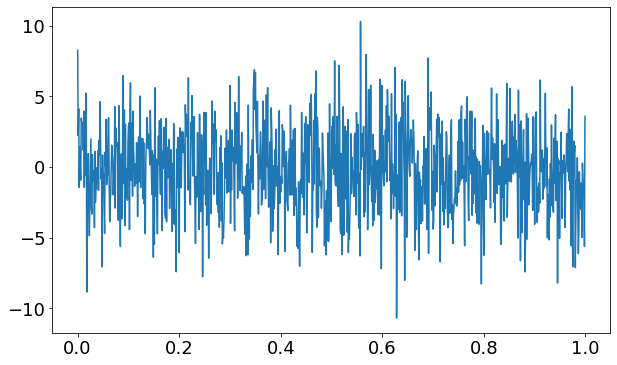

In [4]:
noise = 3*np.random.randn(n_samples)
phase = np.pi/6.
signal = 1*np.sin(2*np.pi*20*time + phase)
vector = signal+noise
plt.plot(time,vector)

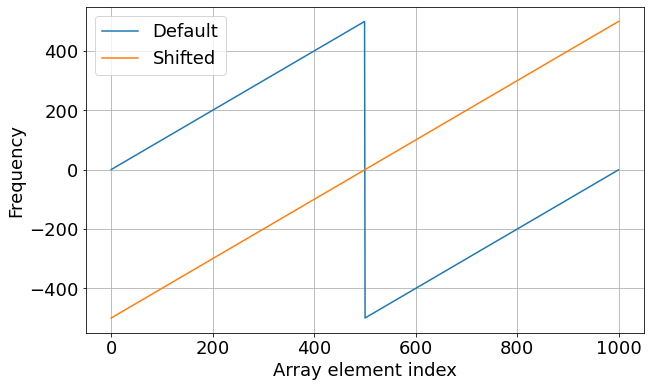

In [5]:
freq = np.fft.fftfreq(n_samples,delta_t)
plt.plot(freq,label='Default')
freq = np.fft.fftshift(freq)
plt.ylabel('Frequency')
plt.xlabel('Array element index')
plt.plot(freq,label='Shifted')
plt.legend()
plt.grid()

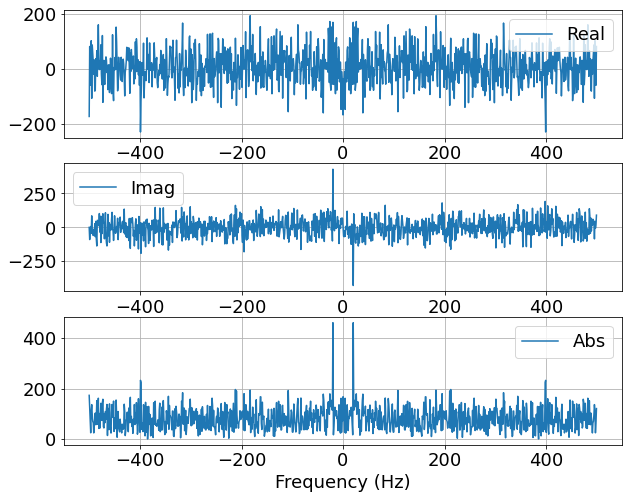

In [6]:
vector_fft = np.fft.fftshift(np.fft.fft(vector))
plt.rcParams['figure.figsize'] = [10, 8]

plt.subplot(3,1,1)
plt.plot(freq,np.real(vector_fft),label='Real')
plt.grid() 
plt.legend(loc='upper right')

plt.subplot(3,1,2)
plt.plot(freq,np.imag(vector_fft),label='Imag')
plt.grid()
plt.legend()

plt.subplot(3,1,3)
plt.plot(freq,np.abs(vector_fft),label='Abs')
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.grid()


# Cross-correlation
of the independent-noise vectors, vector1 and vector2

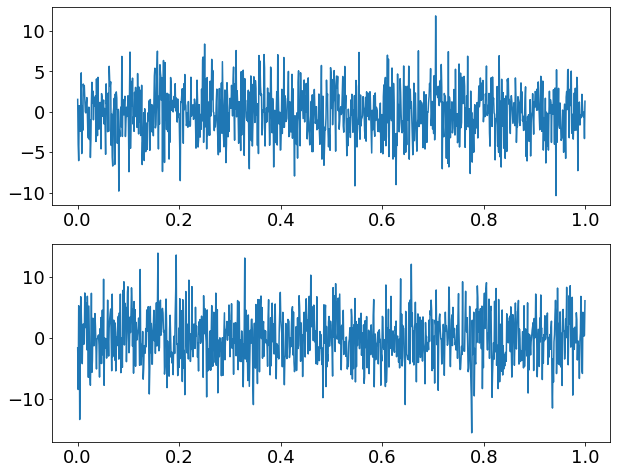

In [31]:
noise1 = 3*np.random.randn(n_samples)
noise2 = 4*np.random.randn(n_samples)


phase = np.pi/6.
signal = 0.8*np.sin(2*np.pi*20*time + phase)

vector1 = signal+noise1
vector2 = signal+noise2

plt.subplot(2,1,1)
plt.plot(time,vector1)

plt.subplot(2,1,2)
plt.plot(time,vector2)

Let's first average the signals and find the PSD (ie not use a cross-correlation)

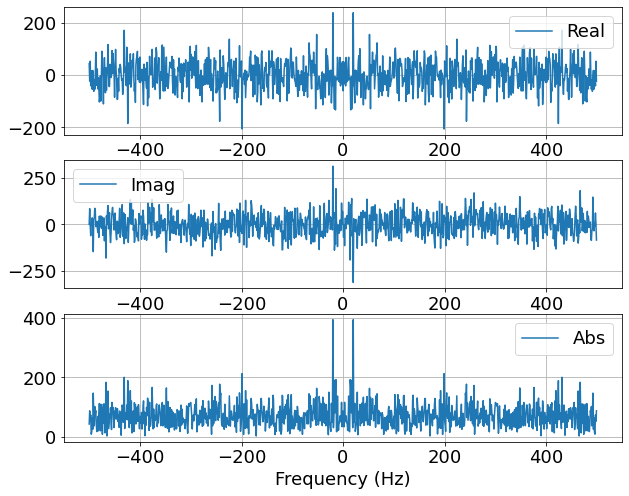

In [32]:
vector_avg = (vector1 + vector2)/2

vector_fft = np.fft.fftshift(np.fft.fft(vector_avg))
plt.rcParams['figure.figsize'] = [10, 8]

plt.subplot(3,1,1)
plt.plot(freq,np.real(vector_fft),label='Real')
plt.grid() 
plt.legend(loc='upper right')

plt.subplot(3,1,2)
plt.plot(freq,np.imag(vector_fft),label='Imag')
plt.grid()
plt.legend()

plt.subplot(3,1,3)
plt.plot(freq,np.abs(vector_fft),label='Abs')
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.grid()

Now let's do a cross correlation.  

fft1 * complex_conj(fft2)

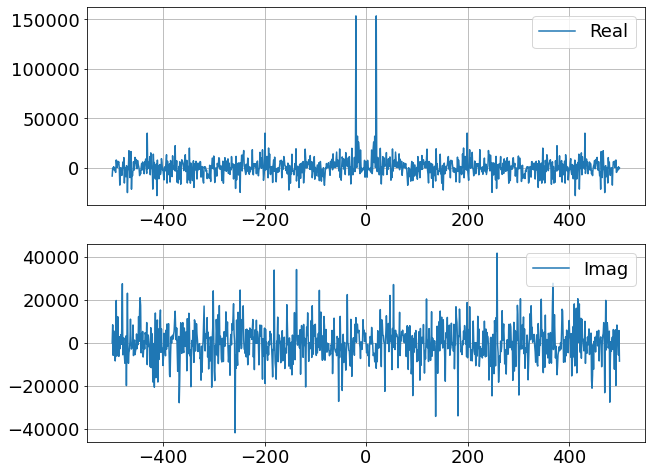

In [33]:
vector1_fft = np.fft.fftshift(np.fft.fft(vector1))
vector2_fft = np.fft.fftshift(np.fft.fft(vector2))
vectors_cross = vector1_fft*np.conj(vector2_fft)

plt.subplot(2,1,1)
plt.plot(freq,np.real(vectors_cross),label='Real')
plt.grid() 
plt.legend(loc='upper right')

plt.subplot(2,1,2)
plt.plot(freq,np.imag(vectors_cross),label='Imag')
plt.grid()
plt.legend()

# Cross-correlation
of the correlated-noise vectors, vector3 and vector4

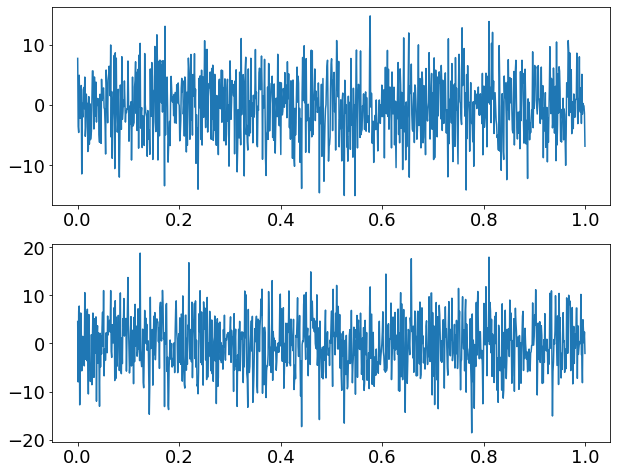

In [38]:
noise3 = 4*np.random.randn(n_samples)

vector3 = vector1 + noise3
vector4 = vector2 + noise3

plt.subplot(2,1,1)
plt.plot(time,vector3)

plt.subplot(2,1,2)
plt.plot(time,vector4)

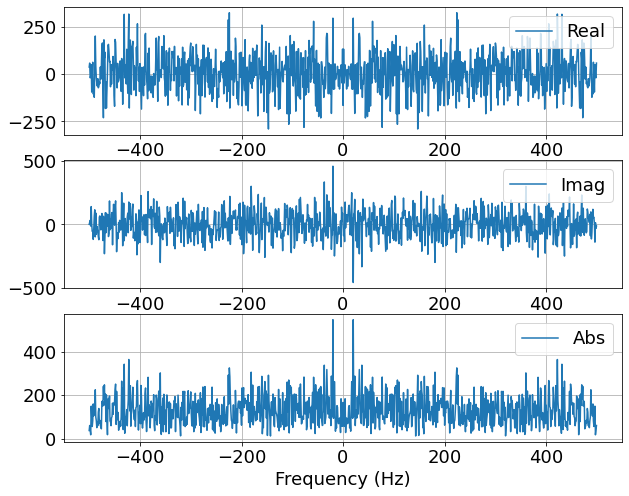

In [39]:
vector_avg = (vector3 + vector4)/2

vector_fft = np.fft.fftshift(np.fft.fft(vector_avg))
plt.rcParams['figure.figsize'] = [10, 8]

plt.subplot(3,1,1)
plt.plot(freq,np.real(vector_fft),label='Real')
plt.grid() 
plt.legend(loc='upper right')

plt.subplot(3,1,2)
plt.plot(freq,np.imag(vector_fft),label='Imag')
plt.grid()
plt.legend()

plt.subplot(3,1,3)
plt.plot(freq,np.abs(vector_fft),label='Abs')
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.grid()

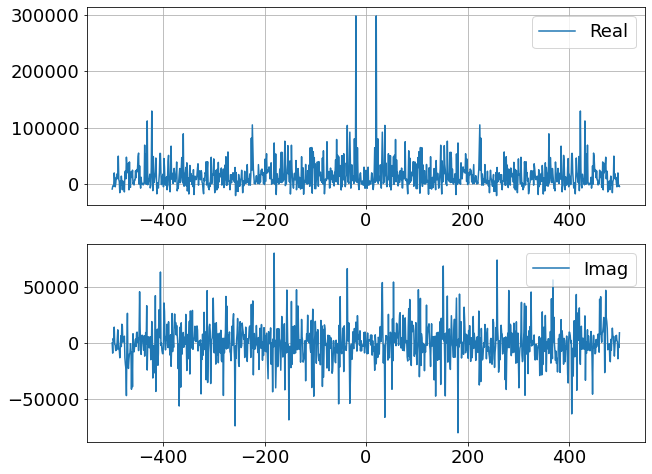

In [40]:
vector3_fft = np.fft.fftshift(np.fft.fft(vector3))
vector4_fft = np.fft.fftshift(np.fft.fft(vector4))
vectors_cross = vector3_fft*np.conj(vector4_fft)

plt.subplot(2,1,1)
plt.plot(freq,np.real(vectors_cross),label='Real')
plt.grid() 
plt.legend(loc='upper right')

plt.subplot(2,1,2)
plt.plot(freq,np.imag(vectors_cross),label='Imag')
plt.grid()
plt.legend()